Analysis: 

1. The max temperature increases in the city as it's getting closer to the 0 lattitude (equator)
2. There is no strong relationship between lattitude and cloudiness, wind speed, and humidity. 
3. The interesting plot is between lattitude and cloudiness. the percentage of cloudiness is divided in to very specific group of percentage, not vary 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import api_key
from citipy import citipy
output_data_file = "output_data/cities.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)


636

In [3]:
data_cities = pd.DataFrame({'City': [city for city in cities]})
data_cities["Cloudiness"] = ''
data_cities["Country"] =''
data_cities["Date"] = ''
data_cities["Humidity"]=''
data_cities["Lat"] = ''
data_cities["Lng"]=''
data_cities["Max Temp"] =''
data_cities["Wind Speed"]=''


In [4]:
sets = 1 
records = 0
max_records = 50
url = "http://api.openweathermap.org/data/2.5/weather?"
payload = {'unit' : 'imperial','appid' : api_key}

In [5]:
print("Beginning Data Retrieval")
print("-------------------------")

for index, row in data_cities.iterrows():
    city_name = row['City']
    payload["q"] = city_name
    weather_json = requests.get(url,params =payload).json()
    print(f"Proceesing Record {records} of Set {sets} | {city_name}")
    
    if records == max_records:
        time.sleep(1.01)
        sets +=1
        records = 0
    try: 
        data_cities.loc[index, "Cloudiness"] = weather_json["clouds"]["all"]
        data_cities.loc[index, "Country"]= weather_json["sys"]["country"]
        data_cities.loc[index, "Date"]=  weather_json["dt"]
        data_cities.loc[index, "Humidity"]= weather_json["main"]["humidity"]
        data_cities.loc[index, "Lat"]= weather_json["coord"]["lat"]
        data_cities.loc[index, "Lng"]= weather_json["coord"]["lon"]
        data_cities.loc[index, "Max Temp"]= weather_json["main"]["temp_max"]
        data_cities.loc[index, "Wind Speed"]= weather_json["wind"]["speed"]
        
    except:
        print("City not found. Skipping...")
    records +=1 
print("-------------------------")    
print("Data Retrieval Complete")
print("-------------------------") 
   

Beginning Data Retrieval
-------------------------
Proceesing Record 0 of Set 1 | illoqqortoormiut
City not found. Skipping...
Proceesing Record 1 of Set 1 | broken hill
Proceesing Record 2 of Set 1 | jieshi
Proceesing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Proceesing Record 4 of Set 1 | port alfred
Proceesing Record 5 of Set 1 | mataura
Proceesing Record 6 of Set 1 | vaitupu
City not found. Skipping...
Proceesing Record 7 of Set 1 | tucurui
Proceesing Record 8 of Set 1 | mahebourg
Proceesing Record 9 of Set 1 | quatre cocos
Proceesing Record 10 of Set 1 | longyearbyen
Proceesing Record 11 of Set 1 | kaitangata
Proceesing Record 12 of Set 1 | sistranda
Proceesing Record 13 of Set 1 | busselton
Proceesing Record 14 of Set 1 | riyadh
Proceesing Record 15 of Set 1 | kuche
City not found. Skipping...
Proceesing Record 16 of Set 1 | new norfolk
Proceesing Record 17 of Set 1 | aklavik
Proceesing Record 18 of Set 1 | rikitea
Proceesing Record 19 of Set 1 | vostok
Proceesing

Proceesing Record 28 of Set 4 | provideniya
Proceesing Record 29 of Set 4 | hermanus
Proceesing Record 30 of Set 4 | dakar
Proceesing Record 31 of Set 4 | gravdal
Proceesing Record 32 of Set 4 | ailigandi
Proceesing Record 33 of Set 4 | leningradskiy
Proceesing Record 34 of Set 4 | strezhevoy
Proceesing Record 35 of Set 4 | nanortalik
Proceesing Record 36 of Set 4 | matagami
Proceesing Record 37 of Set 4 | peniche
Proceesing Record 38 of Set 4 | touros
Proceesing Record 39 of Set 4 | manaus
Proceesing Record 40 of Set 4 | yerbogachen
Proceesing Record 41 of Set 4 | khatanga
Proceesing Record 42 of Set 4 | lompoc
Proceesing Record 43 of Set 4 | constitucion
Proceesing Record 44 of Set 4 | guerrero negro
Proceesing Record 45 of Set 4 | pachino
Proceesing Record 46 of Set 4 | korla
City not found. Skipping...
Proceesing Record 47 of Set 4 | srednekolymsk
Proceesing Record 48 of Set 4 | santa maria
Proceesing Record 49 of Set 4 | nemuro
Proceesing Record 50 of Set 4 | mys shmidta
City not 

Proceesing Record 18 of Set 8 | dalby
Proceesing Record 19 of Set 8 | saleaula
City not found. Skipping...
Proceesing Record 20 of Set 8 | buchanan
Proceesing Record 21 of Set 8 | grand centre
City not found. Skipping...
Proceesing Record 22 of Set 8 | milkovo
Proceesing Record 23 of Set 8 | port macquarie
Proceesing Record 24 of Set 8 | pando
Proceesing Record 25 of Set 8 | kruisfontein
Proceesing Record 26 of Set 8 | moerai
Proceesing Record 27 of Set 8 | bur gabo
City not found. Skipping...
Proceesing Record 28 of Set 8 | fortuna
Proceesing Record 29 of Set 8 | tiruchchendur
Proceesing Record 30 of Set 8 | san jose
Proceesing Record 31 of Set 8 | ust-bolsheretsk
City not found. Skipping...
Proceesing Record 32 of Set 8 | haines junction
Proceesing Record 33 of Set 8 | pangody
Proceesing Record 34 of Set 8 | imbituba
Proceesing Record 35 of Set 8 | wajir
Proceesing Record 36 of Set 8 | champerico
Proceesing Record 37 of Set 8 | barsovo
Proceesing Record 38 of Set 8 | tharad
Proceesin

Proceesing Record 3 of Set 12 | changji
Proceesing Record 4 of Set 12 | pasighat
Proceesing Record 5 of Set 12 | cabedelo
Proceesing Record 6 of Set 12 | almaznyy
Proceesing Record 7 of Set 12 | katsuura
Proceesing Record 8 of Set 12 | malkara
Proceesing Record 9 of Set 12 | kolondieba
Proceesing Record 10 of Set 12 | furtwangen
Proceesing Record 11 of Set 12 | sao gabriel da cachoeira
Proceesing Record 12 of Set 12 | morant bay
Proceesing Record 13 of Set 12 | cap malheureux
Proceesing Record 14 of Set 12 | brigantine
Proceesing Record 15 of Set 12 | sundsvall
Proceesing Record 16 of Set 12 | moose factory
Proceesing Record 17 of Set 12 | luderitz
Proceesing Record 18 of Set 12 | skierniewice
Proceesing Record 19 of Set 12 | kiama
Proceesing Record 20 of Set 12 | nhulunbuy
Proceesing Record 21 of Set 12 | pringsewu
Proceesing Record 22 of Set 12 | plonsk
Proceesing Record 23 of Set 12 | avera
Proceesing Record 24 of Set 12 | kavaratti
Proceesing Record 25 of Set 12 | panji
Proceesing 

In [6]:
data_cities.to_csv("output_data/cities.csv")
file = pd.read_csv("output_data/cities.csv",index_col=0).dropna()
file.to_csv("output_data/cities.csv")

In [7]:
file.count()

City          567
Cloudiness    567
Country       567
Date          567
Humidity      567
Lat           567
Lng           567
Max Temp      567
Wind Speed    567
dtype: int64

In [8]:
file.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,broken hill,0.0,AU,1.552532e+09,21.0,-31.97,141.45,299.150,2.60
2,jieshi,20.0,CN,1.552534e+09,86.0,22.82,115.83,294.305,7.06
4,port alfred,56.0,ZA,1.552534e+09,90.0,-33.59,26.89,290.930,3.46
5,mataura,88.0,NZ,1.552534e+09,67.0,-46.19,168.86,287.590,2.24
7,tucurui,68.0,BR,1.552534e+09,96.0,-3.77,-49.67,297.130,0.71


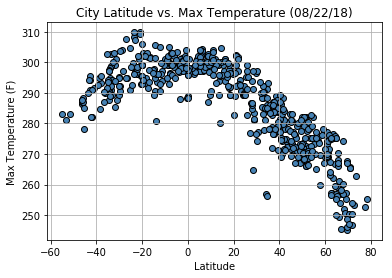

In [9]:
plt.scatter(
file['Lat'],
file['Max Temp'],marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/MaxTemp_vs_Latitude.png")
plt.show()

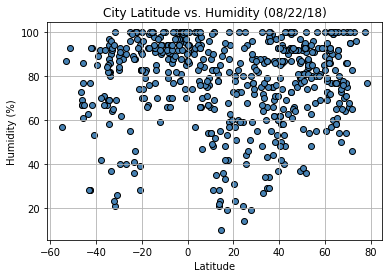

In [10]:
plt.scatter(
file['Lat'],
file['Humidity'],marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Humidity_vs_Latitude.png")
plt.show()

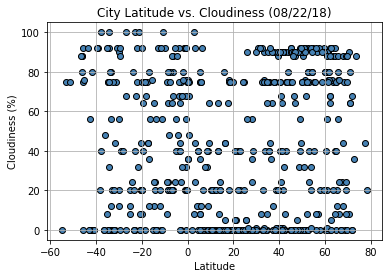

In [11]:
plt.scatter(
file['Lat'],
file['Cloudiness'],marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Cloudiness_vs_Latitude.png")
plt.show()

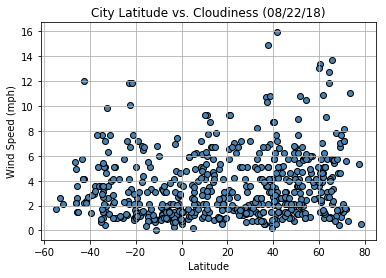

In [12]:
plt.scatter(
file['Lat'],
file['Wind Speed'],marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/WindSpeed_vs_Latitude.png")
plt.show()